In [1]:
from PIL import Image

from PIL import ImageFilter

import math

import matplotlib.pyplot as plt
import cv2

In [2]:
def threshold_func(f):
    if f<int(255/2):
        f=0
    else:
        f=255
    return f
def threshold_transform(img):
    for i in range(0, img.size[0]-1):
        for j in range(0,img.size[1]-1):
            f=img.getpixel((i,j))
            
            redPixel= threshold_func(f[0])
            greenPixel= threshold_func(f[1])
            bluePixel= threshold_func(f[2])
            img.putpixel((i,j),(redPixel, greenPixel, bluePixel))
    return img

In [3]:
def log_func(c, f):

    g = c * math.log(float(1 + f),10);

    return g;

def log_transform(img, outputMax = 255, inputMax=255):

    c = outputMax/math.log(inputMax+1,10);   
    for i in range(0, img.size[0]-1):

        for j in range(0, img.size[1]-1):

            f = img.getpixel((i,j));


            redPixel    = round(log_func(c, f[0]))
            greenPixel  = round(log_func(c, f[1]))
            bluePixel   = round(log_func(c, f[2]))
            img.putpixel((i,j),(redPixel, greenPixel, bluePixel))
 

    return img

In [4]:
def negative_transform(img):
    for i in range(0, img.size[0]-1):
        for j in range(0, img.size[1]-1):
            f=img.getpixel((i,j))
            
            redPixel= round(255-f[0])
            greenPixel= round(255-f[1])
            bluePixel= round(255-f[2])
            img.putpixel((i,j), (redPixel, greenPixel, bluePixel))
        
    return img

In [5]:
def gamma_func(c, f):
    g= c* (float(f)**(2))
    return g

def gamma_transform(img, outputMax = 255, inputMax=255):

    c = (outputMax)/(inputMax**2);   
    for i in range(0, img.size[0]-1):
        for j in range(0, img.size[1]-1):
            f=img.getpixel((i,j))
            
            redPixel=round(gamma_func(c, f[0]))
            greenPixel=round(gamma_func(c,f[1]))
            bluePixel=round(gamma_func(c, f[2]))
            img.putpixel((i,j), (redPixel, greenPixel, bluePixel))
                
    return img

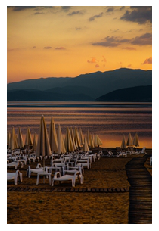

In [6]:
ori_img=Image.open("C:\\Users\\Nam Le\\sunsetsmall.jpg")
plt.axis("off")
plt.imshow(ori_img)
plt.show()

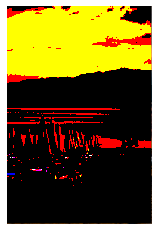

In [7]:
new_image = ori_img.copy()
new_image= threshold_transform(new_image)
plt.axis("off")
plt.imshow(new_image)
plt.show()

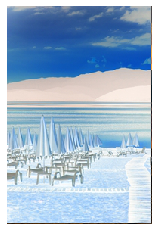

In [8]:
new_image = ori_img.copy()
new_image= negative_transform(new_image)
plt.axis("off")
plt.imshow(new_image)
plt.show()

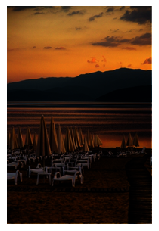

In [9]:
new_image = ori_img.copy()
new_image = gamma_transform(new_image)
plt.axis("off")
plt.imshow(new_image)
plt.show()

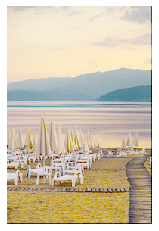

In [10]:
new_image = ori_img.copy()
new_image = log_transform(new_image)
plt.axis("off")
plt.imshow(new_image)
plt.show()